# Przekształcenia morfologiczne

## Cel:
- zapoznanie z podstawowymi przekształceniami morfologicznymi – erozją, dylatacją, otwarciem, zamknięciem, transformacją "trafi - nie trafi",
- zapoznanie ze złożonymi operacjami morfologicznymi, wykorzystującymi rekonstrukcję morfologiczną,
- zapoznanie z operacjami morfologicznymi dla obrazów w odcieniach szarości – erozją, dylatacją, otwarciem, zamknięciem, filtrami *top-hat* i *bottom-hat*,
- zapoznanie z wykorzystaniem złożonych operacji morfologicznych przy rozwiązywaniu konkretnego problemu,
- zadanie domowe: wykorzystanie morfologii do implementacji "gry w życie".

## Przypomnienie teorii

### Element strukturalny

Element strukturalny obrazu jest to pewien wycinek obrazu (przy dyskretnej reprezentacji obrazu – pewien podzbiór jego elementów).
Najczęściej stosowanym elementem strukturalnym jest kwadratowa maska o rozmiarze 3×3 lub 5×5. Niekiedy pożądane są maski o innym kształcie, np. zbliżonym do elipsy.

### Erozja

Erozja (ang. _erosion_) jest podstawowym przekształceniem morfologicznym.
Zakładamy, że obraz wejściowy zawiera pewien obszar (figurę) X, wyróżniający się pewną charakterystyczną cechą (np. odróżniającą się od tła jasnością).
Figura X po wykonaniu operacji erozji to zbiór punktów centralnych wszystkich elementów strukturalnych, które w całości mieszczą się we wnętrzu obszaru X.
Miarą stopnia erozji jest wielkość elementu strukturalnego.

**Erozję** można traktować jako **filtr minimalny**, tj. z danego otoczenia piksela (określanego przez maskę) do obrazu wynikowego wybierana jest wartość minimalna.

### Dylatacja

Dylatacja (ang. _dilation_): Zakładamy, że obraz wejściowy zawiera obszar X wyróżniający się pewną charakterystyczną cechą (jak powyżej). Figura przekształcona przez dylatację to zbiór punktów centralnych wszystkich elementów strukturalnych, których którykolwiek punkt mieści się we wnętrzu obszaru X. Miarą  dylatacji jest wielkość elementu strukturalnego.

**Dylatację** można traktować jako **filtr maksymalny**, tj. z danego otoczenia piksela (określanego
przez maskę) do obrazu wynikowego wybierana jest wartość maksymalna.

### Otwarcie i zamknięcie

Otwarcie (ang. _opening_) polega na wykonaniu najpierw operacji erozji, a następnie dylatacji.

> Otwarcie = erozja + dylatacja

Zamknięcie (ang. _closing_) polega na wykonaniu najpierw operacji dylatacji, a następnie erozji.

> Zamknięcie = dylatacja + erozja

### Obrazy w odcieniu szarości

Obrazy w odcieniu szarości – detekcja dolin i szczytów (ang. _top-hat_, _bottom-hat_): aby wyodrębnić z obrazu ekstrema lokalne, można wykorzystać zdefiniowane wcześniej przekształcenia: otwarcie i zamknięcie.
W celu wyszukania maksimów lokalnych (szczytów) należy od wyniku otwarcia danego obrazu odjąć obraz wejściowy.
Analogicznie, aby wyodrębnić minima lokalne obrazu, należy dokonać podobnej operacji, z tym że pierwszą operacją bedzie zamknięcie.
Uwaga! Poniższe metody służą do detekcji (pokreślenia) tylko lokalnych ekstremów!

## Podstawowe operacje morfologiczne: erozja, dylatacja, otwarcie, zamknięcie, "trafi - nie trafi"

1. Wczytaj obraz *ertka.bmp*.
2. Wykonaj operację erozji `cv2.erode`. Parametrami funkcji są obraz oraz element strukturalny. Element można stworzyć samodzielnie, jako tablicę składającą się z 0 i 1 `np.ones((3, 3))` lub posłużyć się funkcją `cv2.getStructuringElement`, do której należy podać kształt `cv2.MORPH_RECT` oraz wielkość elementu `(3, 3)`. Na początku użyj kwadratu o rozmiarze 3 pikseli.
3. Wyświetl obraz oryginalny oraz po wykonaniu erozji – najlepiej na wspólnym wykresie. Upewnij się, że rozumiesz, jak działa erozja.
4. Zmień element strukturalny (inny kształt – koło, diament lub inny rozmiar). Ponownie wykonaj erozję, sprawdź rezultat działania operacji.
5. Oprócz zmiany elementu strukturalnego na rezultat erozji można wpłynąć, zwiększając liczbę iteracji (np. wykonać erozję trzykrotnie). Ustal element strukturalny na kwadrat o boku 3 piksele. Wykonaj erozję obrazu _ertka.bmp_ dwukrotnie, a następnie trzykrotnie. Zaobserwuj rezultaty. Wskazówka: warto zajrzeć do dokumentacji funkcji `cv2.erode`.
6. Wczytaj obraz *buzka.bmp*. Dobierz element strukturalny (zdefiniuj go ręcznie jako macierz 0 i 1) w taki sposób, aby usunąć włosy o określonej orientacji (ukośnie w lewo lub w prawo).
7. Uwaga: pokazane metody wpływania na rezultaty erozji wykorzystuje się identycznie dla pozostałych operacji morfologicznych – dylatacji, otwarcia i zamknięcia.
8. Operacją odwrotną (w pewnym sensie) do erozji jest dylatacja - realizowana przez funkcję `cv2.dilate`. Ustal element strukturalny na kwadrat o boku 3 piksele. Wykonaj dylatację obrazu _ertka.bmp_. Zapoznaj się z rezultatem działania.
9. Na wspólnym wykresie wyświetl obraz oryginalny oraz obrazy po operacjach morfologicznych: erozja, dylatacja, otwarcie i zamknięcie. Otwarcie i zamknięcie można uzyskać za pomocą `cv2.morphologyEx(obraz, operacja, element_strukturalny)`, gdzie typem operacji jest `cv2.MORPH_OPEN` lub `cv2.MORPH_CLOSE`.
10. Zmień obraz _ertka.bmp_ na _wyspa.bmp_, a następnie na _kolka.bmp_. Wykonaj na każdym cztery przedstawione operacje morfologiczne. Zaobserwuj rezultaty.
11. Minizadanko: wykorzystując poznane operacje morfologiczne, spowoduj, że na obrazie _ertka.bmp_ pozostanie tylko napis RT (bez wypustek i dziur).
12. Niekiedy potrzebne jest wykrycie konkretnych konfiguracji pikseli na obrazie – przydaje się do tego transformacja *trafi - nie trafi* (ang. _hit-or-miss_). Pozwala ona wykryć na obrazie obecność elementów, które dokładnie odpowiadają masce.
13. Wczytaj obraz *hom.bmp*. Wyświetl go. Załóżmy, że chcemy wykryć na obrazie krzyżyki 3x3. Zdefiniuj następujący element strukturalny:
```
[0, 1, 0]
[1, 1, 1]
[0, 1, 0]
```
Wykonaj transformację "trafi - nie trafi" – `cv2.morphologyEx(hom, cv2.MORPH_HITMISS, structuring_element)`. Rezultat operacji wyświetl. Czy udało się zrealizować zadanie? Jeżeli pojawiają się u Państwa błędy związane z typem danych, należy obraz wejściowy przekonwertować na skalę szarości: `cv2.cvtColor(hom, cv2.COLOR_BGR2GRAY)`.


In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import requests

url = "https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/"
fileNames = [
    "buzka.bmp", "calculator.bmp", "ertka.bmp", "ferrari.bmp", "fingerprint.bmp", "hom.bmp",
    "kolka.bmp", "kosc.bmp", "szkielet.bmp", "text.bmp", "wyspa.bmp", "rice.png"
]

# pobranie wszystkich potrzebnych obrazków
for fileName in fileNames:
    if not os.path.exists(fileName):
        r = requests.get(url + fileName, allow_redirects = True)
        open(fileName, 'wb').write(r.content)

In [2]:
# pomocnicza funkcja do wyświetlenia pojedynczego obrazka
def show_image(image, title):
    plt.imshow(image, 'gray', vmin = 0, vmax = 255)
    plt.title(title)
    plt.axis('off')

In [3]:
# pomocnicza funkcja do wyświetlenia obrazu i wyniku wybranej operacji morfologicznej
def show_image_morph_single(image, morph, name, shape):
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(shape)
    fig.suptitle("Wspólny wykres oryginalnego obrazka i obrazka po operacji morfologicznej", fontsize = 16)
    
    axs[0].imshow(image, 'gray', vmin = 0, vmax = 255)
    axs[0].set_title(f"Oryginalny obrazek {name}")
    axs[0].axis('off')
    
    axs[1].imshow(morph, 'gray', vmin = 0, vmax = 255)
    axs[1].set_title("Obrazek po operacji morfologicznej")
    axs[1].axis('off')

In [4]:
# pomocnicza funkcja do wyświetlenia obrazu i wyniku operacji morfologicznych: erozji, dylatacji, otwarcia i zamknięcia
def show_image_morph_operations(image, e, d, o, c, name, shape):
    fig, axs = plt.subplots(2, 3)
    fig.set_size_inches(shape)
    fig.suptitle(f"Wspólny wykres oryginalnego obrazka i wyników operacji morfologicznych", fontsize = 16)
    
    axs[0, 0].imshow(image, 'gray', vmin = 0, vmax = 255)
    axs[0, 0].set_title(f"Oryginalny obrazek {name}")
    axs[0, 0].axis('off')
    
    axs[0, 1].imshow(e, 'gray', vmin = 0, vmax = 255)
    axs[0, 1].set_title("Obrazek po operacji erozji")
    axs[0, 1].axis('off')
    
    axs[0, 2].imshow(d, 'gray', vmin = 0, vmax = 255)
    axs[0, 2].set_title("Obrazek po operacji dylatacji")
    axs[0, 2].axis('off')
    
    axs[1, 0].imshow(o, 'gray', vmin = 0, vmax = 255)
    axs[1, 0].set_title("Obrazek po operacji otwarcia")
    axs[1, 0].axis('off')
    
    axs[1, 1].imshow(c, 'gray', vmin = 0, vmax = 255)
    axs[1, 1].set_title("Obrazek po operacji zamknięcia")
    axs[1, 1].axis('off')
    
    axs[1, 2].axis('off')

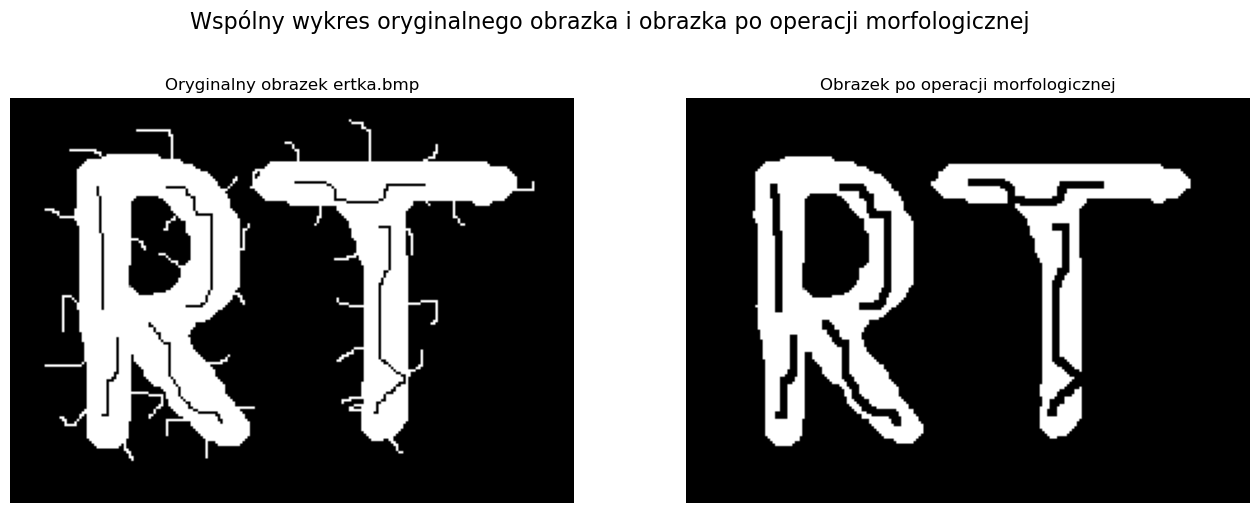

In [5]:
# wczytanie obrazu ertka.bmp
ertka = cv2.imread('ertka.bmp', cv2.IMREAD_GRAYSCALE) 

# wykonanie operacji erozji na obrazie
eroded_ertka = cv2.erode(src = ertka, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))

# wyświetlenie obrazów wspólnie
show_image_morph_single(ertka, eroded_ertka, 'ertka.bmp', (16, 6))

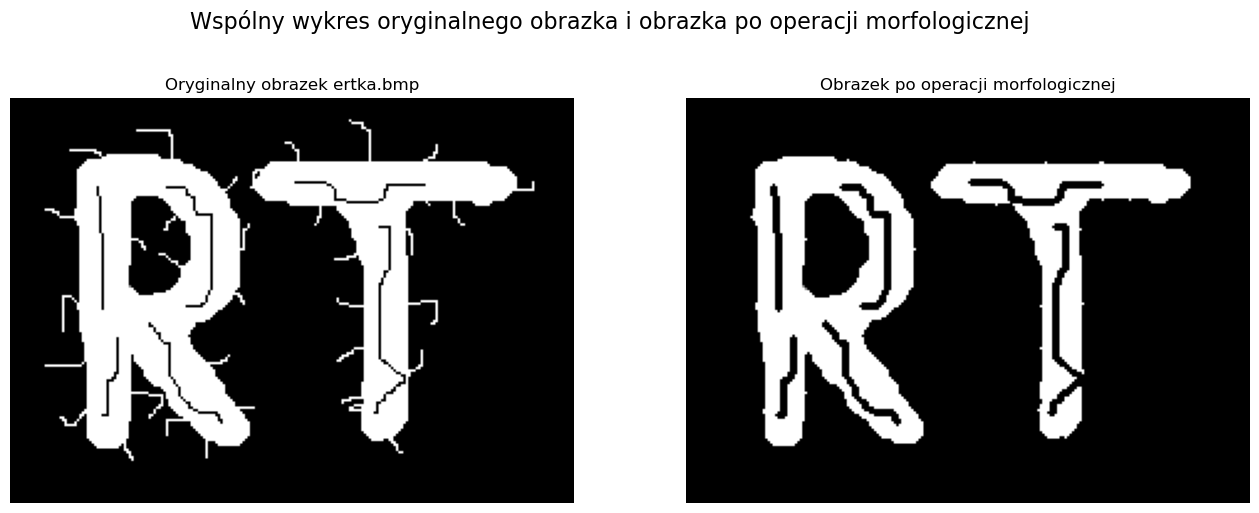

In [6]:
# dla elementu strukturalnego - koło
eroded_ertka = cv2.erode(src = ertka, kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
show_image_morph_single(ertka, eroded_ertka, 'ertka.bmp', (16, 6))

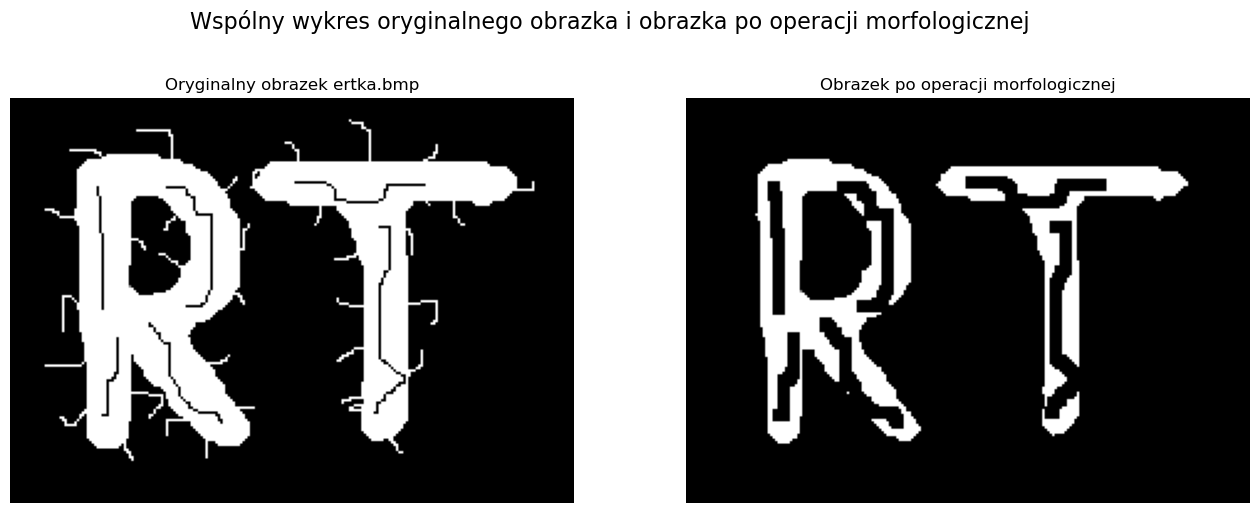

In [7]:
# dwukrotne wykonanie erozji
eroded_ertka = cv2.erode(src = ertka, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), iterations = 2)
show_image_morph_single(ertka, eroded_ertka, 'ertka.bmp', (16, 6))

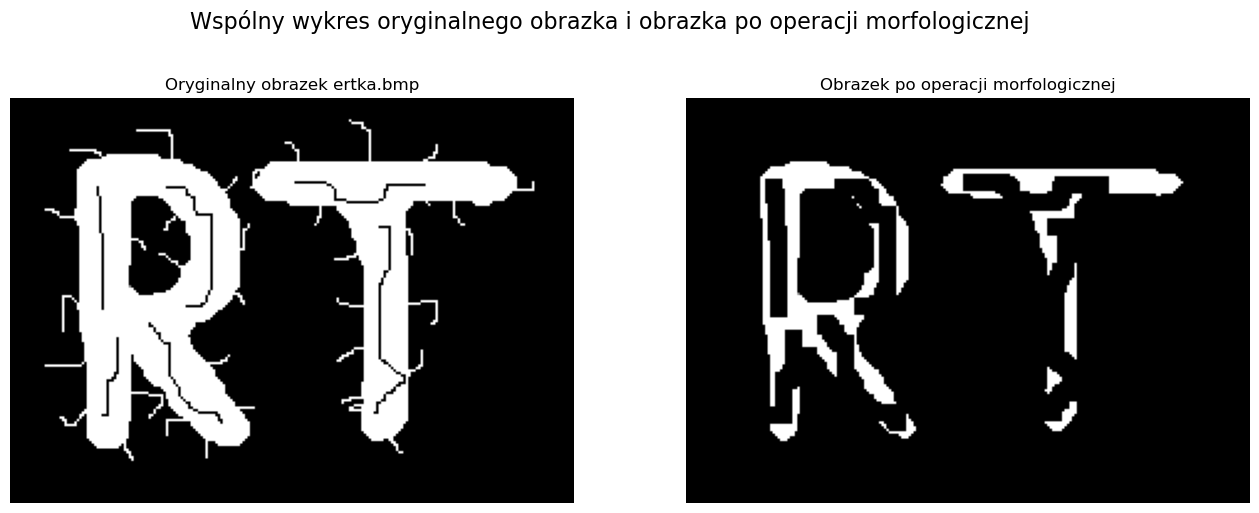

In [8]:
# trzykrotne wykonanie erozji
eroded_ertka = cv2.erode(src = ertka, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), iterations = 3)
show_image_morph_single(ertka, eroded_ertka, 'ertka.bmp', (16, 6))

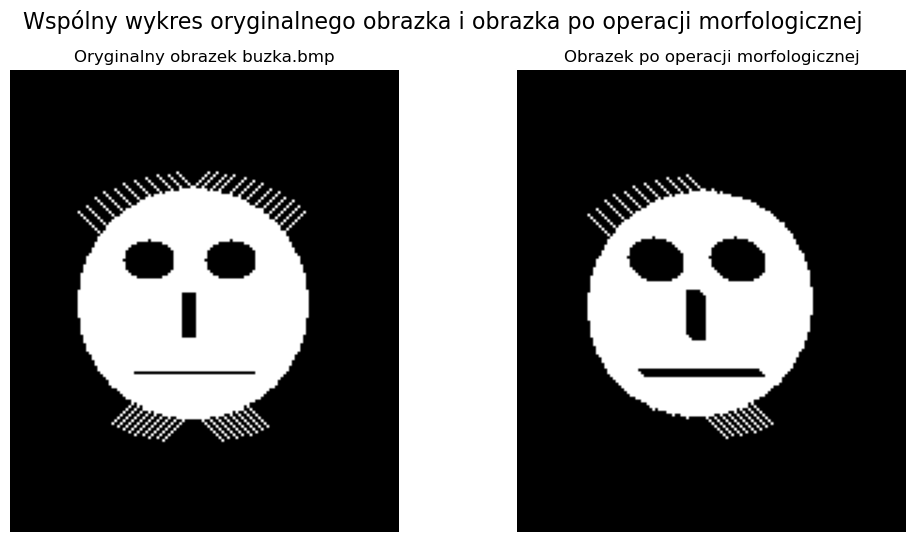

In [9]:
buzka = cv2.imread('buzka.bmp', cv2.IMREAD_GRAYSCALE)

# definiuję wybrany przeze mnie element strukturalny
# usuwam włosy i brodę skierowane ukośnie w prawo
structuring_element = np.array([
    [1, 0, 0], 
    [0, 1, 0], 
    [0, 0, 1]
], dtype = np.uint8)

eroded_buzka = cv2.erode(src = buzka, kernel = structuring_element)
show_image_morph_single(buzka, eroded_buzka, 'buzka.bmp', (12, 6))

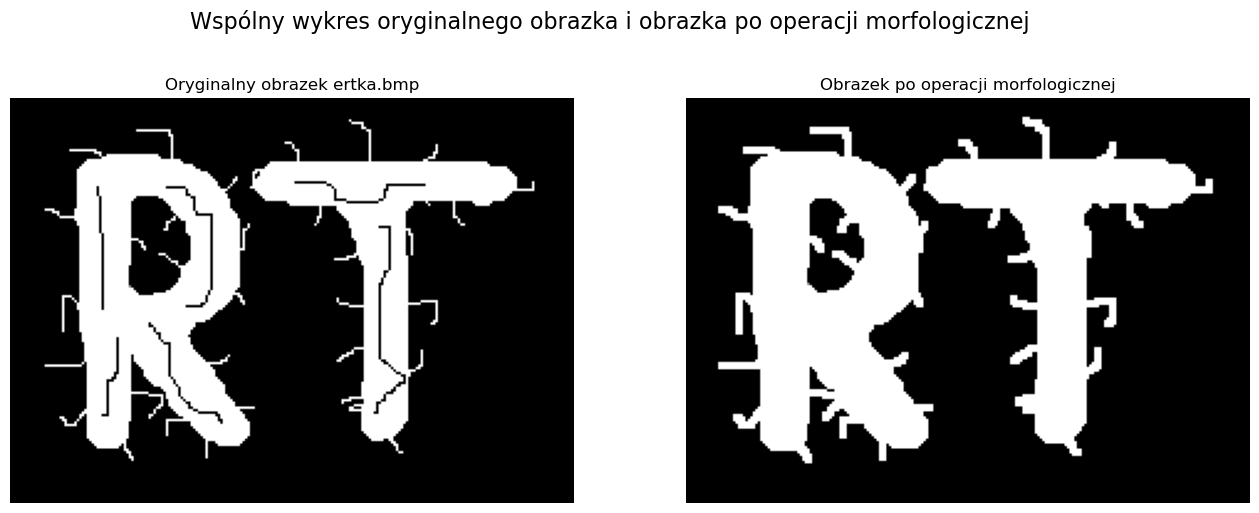

In [10]:
# wykonanie operacji dylatacji na obrazie
dilated_ertka = cv2.dilate(src = ertka, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))

# wyświetlenie obrazów wspólnie
show_image_morph_single(ertka, dilated_ertka, 'ertka.bmp', (16, 6))

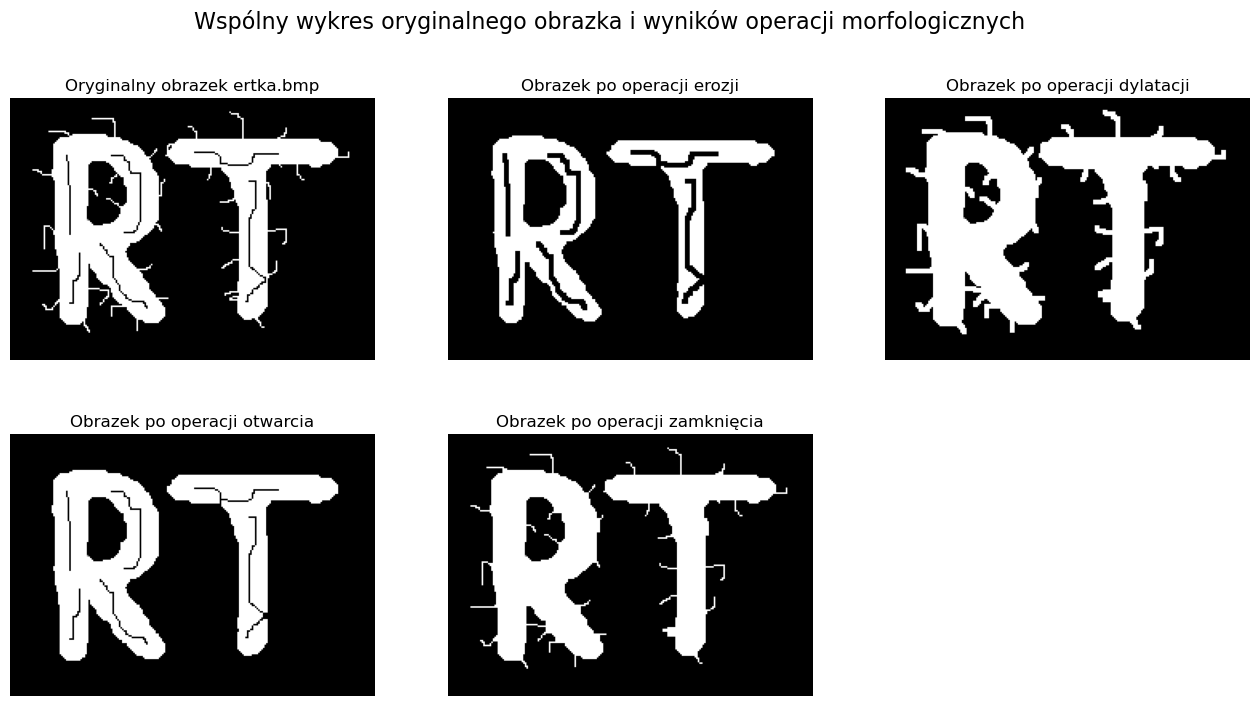

In [11]:
# wykonanie operacji erozji, dylatacji, otwarcia i zamknięcia dla obrazu ertka.bmp
eroded = cv2.erode(src = ertka, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
dilated = cv2.dilate(src = ertka, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
opened = cv2.morphologyEx(src = ertka, op = cv2.MORPH_OPEN, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
closed = cv2.morphologyEx(src = ertka, op = cv2.MORPH_CLOSE, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))

# wyświetlenie rezultatów wspólnie z oryginalnym obrazkiem
show_image_morph_operations(ertka, eroded, dilated, opened, closed, 'ertka.bmp', (16, 8))

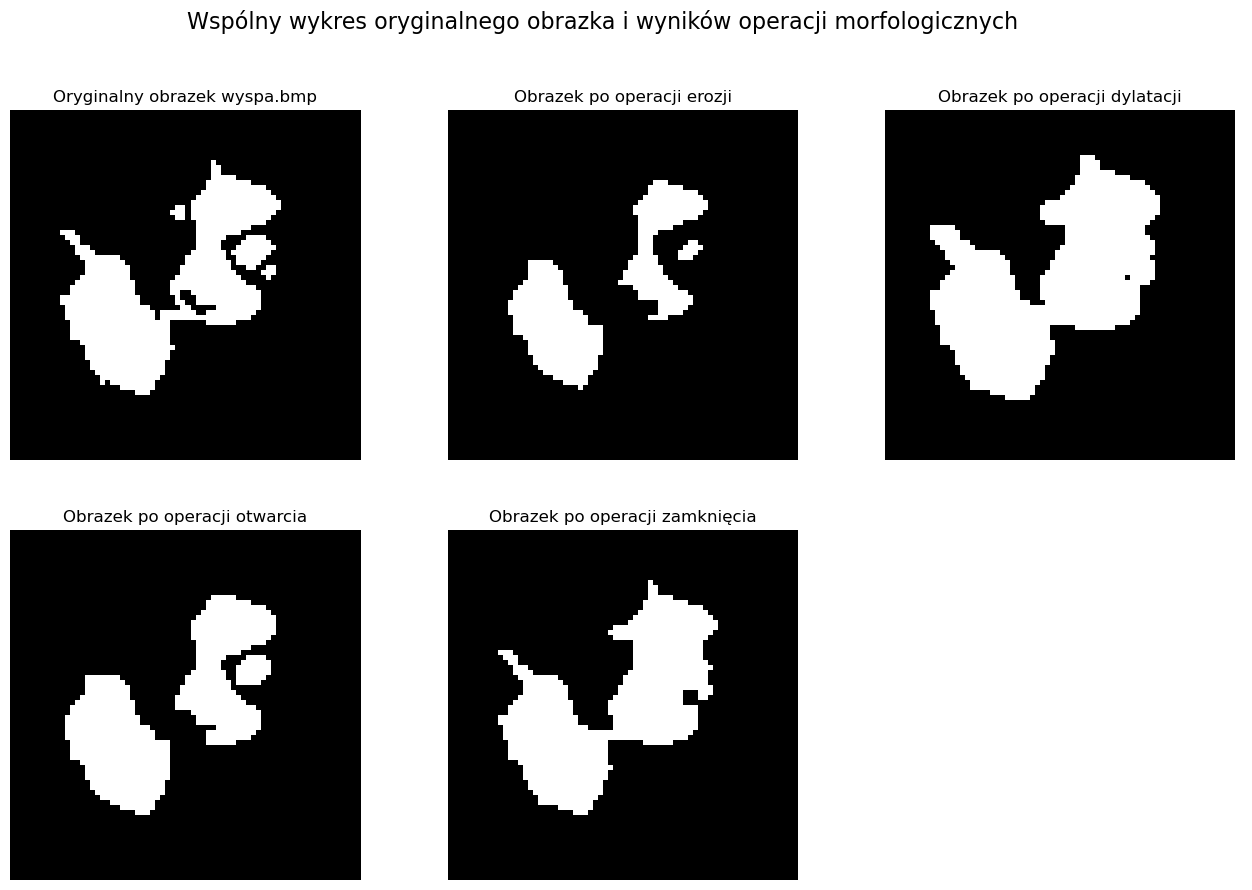

In [12]:
# wczytanie obrazu wyspa.bmp
wyspa = cv2.imread('wyspa.bmp', cv2.IMREAD_GRAYSCALE) 

# operacje i wyświetlenie analogicznie jak powyżej
eroded = cv2.erode(src = wyspa, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
dilated = cv2.dilate(src = wyspa, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
opened = cv2.morphologyEx(src = wyspa, op = cv2.MORPH_OPEN, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
closed = cv2.morphologyEx(src = wyspa, op = cv2.MORPH_CLOSE, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))

show_image_morph_operations(wyspa, eroded, dilated, opened, closed, 'wyspa.bmp', (16, 10))

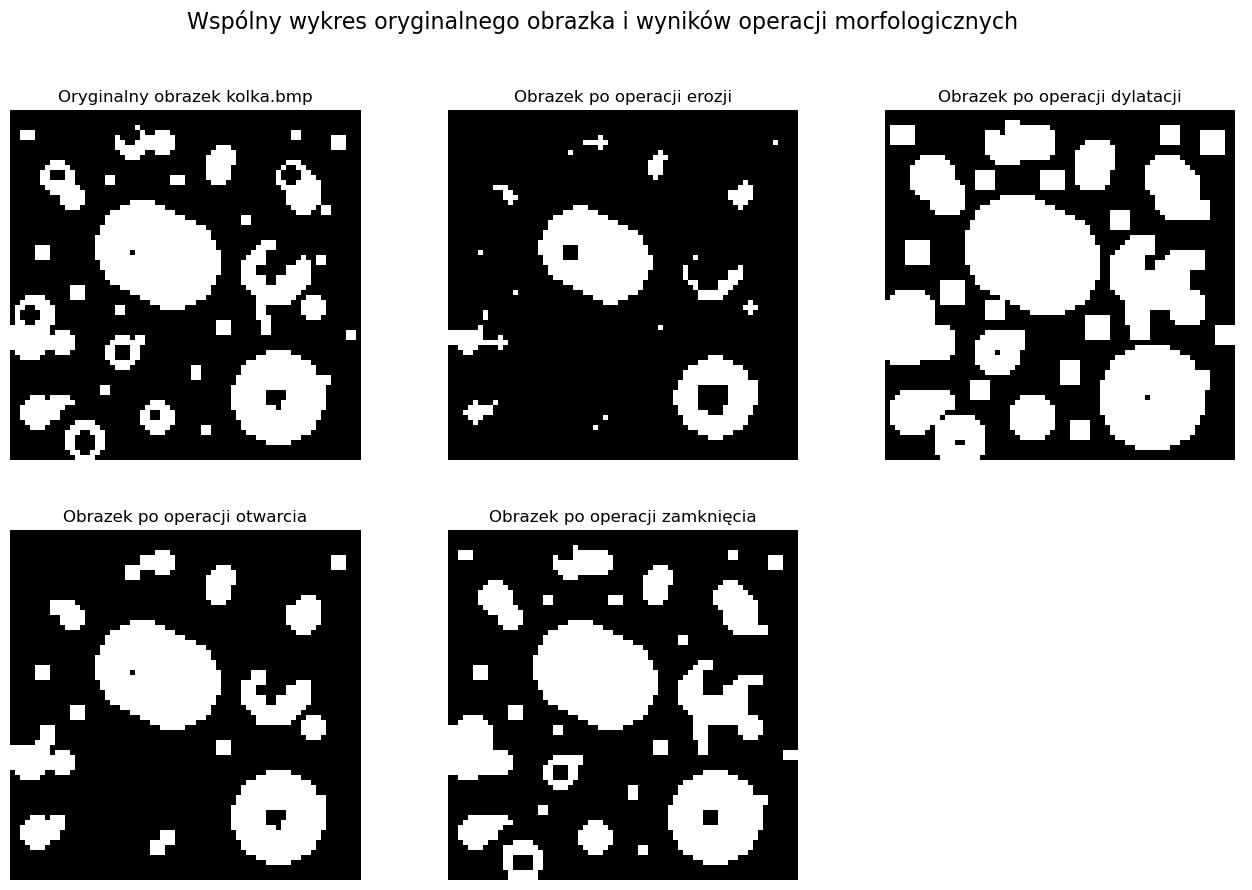

In [13]:
# wczytanie obrazu kolka.bmp
kolka = cv2.imread('kolka.bmp', cv2.IMREAD_GRAYSCALE) 

# operacje i wyświetlenie analogicznie jak powyżej
eroded = cv2.erode(src = kolka, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
dilated = cv2.dilate(src = kolka, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
opened = cv2.morphologyEx(src = kolka, op = cv2.MORPH_OPEN, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
closed = cv2.morphologyEx(src = kolka, op = cv2.MORPH_CLOSE, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))

show_image_morph_operations(kolka, eroded, dilated, opened, closed, 'kolka.bmp', (16, 10))

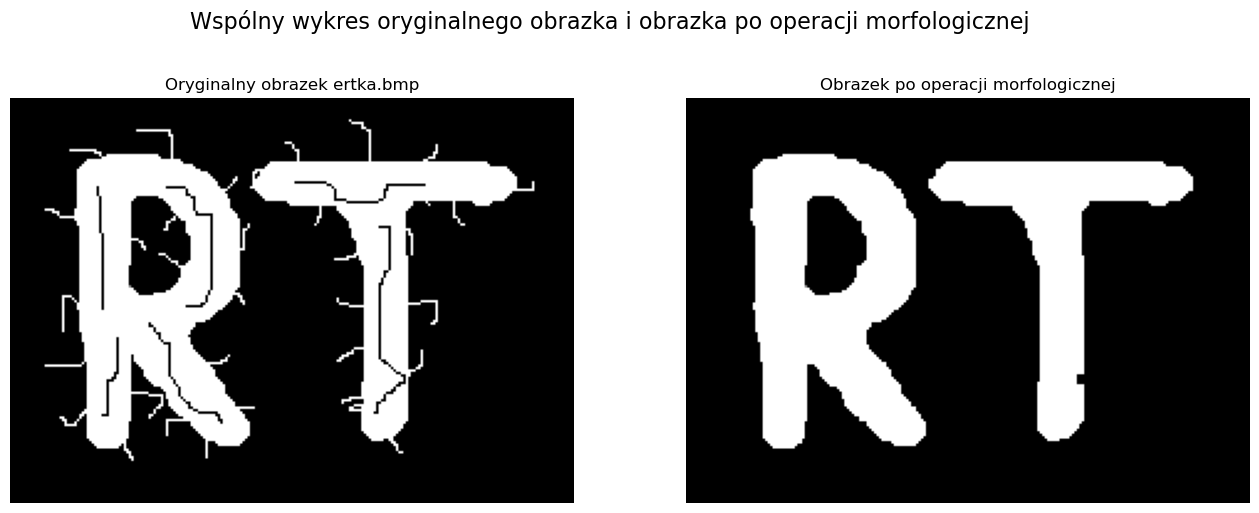

In [14]:
# minizadanko
opened_ertka = cv2.morphologyEx(src = ertka, op = cv2.MORPH_OPEN, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
closed_opened_ertka = cv2.morphologyEx(src = opened_ertka, op = cv2.MORPH_CLOSE, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))

# obrazek po operacji nie powinien mieć wypustek ani dziur
show_image_morph_single(ertka, closed_opened_ertka, 'ertka.bmp', (16, 6))

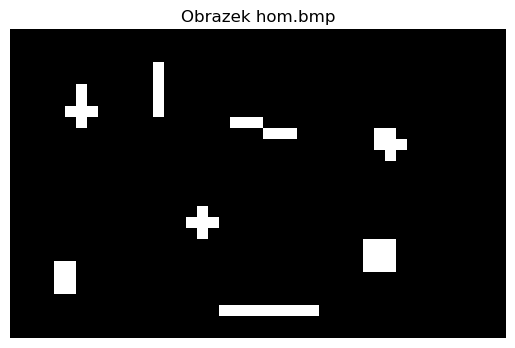

In [15]:
# wczytanie obrazu hom.bmp
hom = cv2.imread('hom.bmp', cv2.IMREAD_GRAYSCALE)

# wyświetlam obrazek
show_image(hom, "Obrazek hom.bmp")

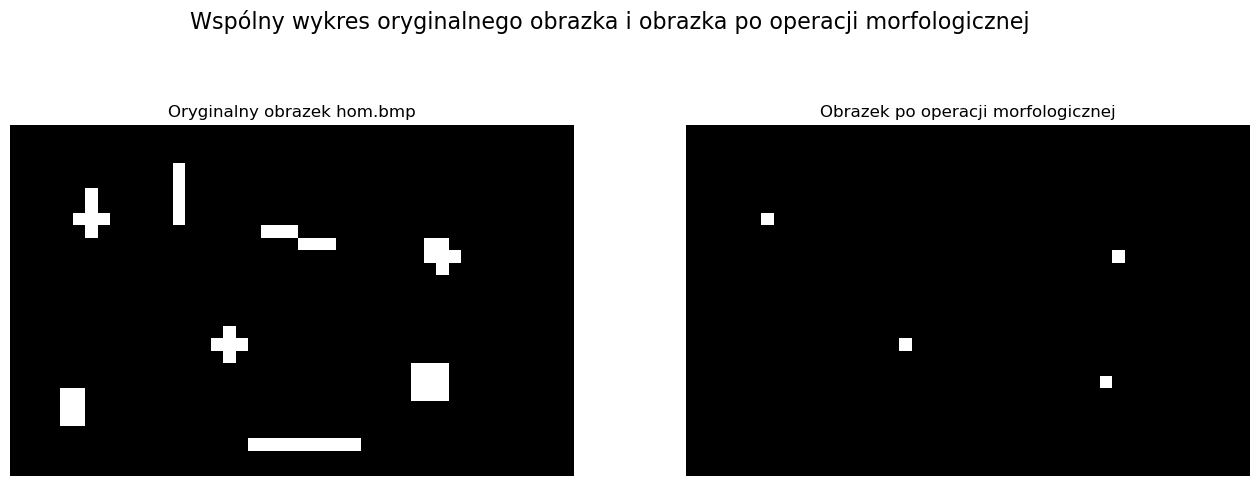

In [16]:
# definiuję element strukturalny
structuring_element = np.array([
    [0, 1, 0], 
    [1, 1, 1], 
    [0, 1, 0]
], dtype = np.uint8)

morphed_hom = cv2.morphologyEx(src = hom, op = cv2.MORPH_HITMISS, kernel = structuring_element)
show_image_morph_single(hom, morphed_hom, 'hom.bmp', (16, 6))


---

#### Czy udało się zrealizować zadanie?

Według mnie tak, bowiem na obrazku po operacji morfologicznej zostały wykryte środki "plusów" (krzyżyków 3x3), co było naszym zadaniem, specjalnie pod to przygotowaliśmy taką maskę.

---


## Inne operacje morfologiczne
Do innych operacji morfologicznych należą między innymi ścienianie (ang. _thinning_), szkieletyzacja (ang. _skeletonization_), rekonstrukcja morfologiczna (ang. _morphological reconstruction_), czyszczenie brzegu (ang. _clearing border_) i uzupełnianie dziur (ang. _filling holes_). W tym rozdziale zostanie zaprezentowana rekonstrukcja morfologiczna.

Rekonstrukcja morfologiczna jest operacją trójargumentową. Wymaga podania tzw. _markera_ (obrazu, od którego zacznie się transformacja), maski (ograniczenia transformacji) oraz elementu strukturalnego. Operacja polega na wykonywaniu kroków (dopóki w dwóch kolejnych iteracjach nic się nie zmieni):
- dylatacja markera (z danym elementem strukturalnym),
- nowy marker = część wspólna dylatacji starego markera i maski.

Trzy operacje, które wykorzystują schemat rekonstrukcji to: 
- otwarcie poprzez rekonstrukcję,
- wypełnianie dziur,
- czyszczenie brzegu.

### Otwarcie poprzez rekonstrukcję
- Wczytaj obraz *text.bmp* i wyświetl go,
- Załóżmy, że chcemy wykryć na obrazie litery, które zawierają długie pionowe fragmenty. W pierwszym podejściu stosujemy morfologiczne otwarcie z maską pionową o wysokości 51 pikseli (taka jest średnia wysokość liter na obrazie) – czyli mamy maskę `np.ones((51, 1))`. Sprawdź rezultat takiej operacji.
- Detekcja wprawdzie się udała, ale otrzymujemy tylko pionowe kreski!
- Rozwiązaniem jest rekonstrukcja – jako marker wybieramy obraz oryginalny poddany erozji. Maskę stanowi obraz oryginalny. Samodzielnie dobierz element strukturalny.
- Zaimplementuj rekonstrukcję i porównaj efekt otwarcia i rekonstrukcji.


In [17]:
# funkcja dokonująca rekonstrukcji dla obrazu binarnego
def morphological_reconstruction_binary(marker, mask, structuring_element):
    prev_marker = marker
    
    while True:
        dilated_marker = cv2.dilate(src = prev_marker, kernel = structuring_element)
        new_marker = dilated_marker & mask
        
        # sprawdzenie, czy nic się nie zmieniło - warunek końca
        if np.all(prev_marker == new_marker):
            return prev_marker
        
        # kolejna iteracja
        prev_marker = new_marker

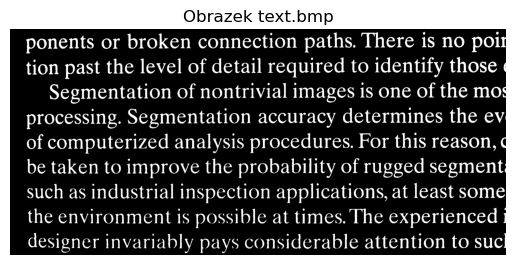

In [18]:
# wczytanie obrazu text.bmp
text = cv2.imread('text.bmp', cv2.IMREAD_GRAYSCALE)

# wyświetlam obrazek
show_image(text, "Obrazek text.bmp")

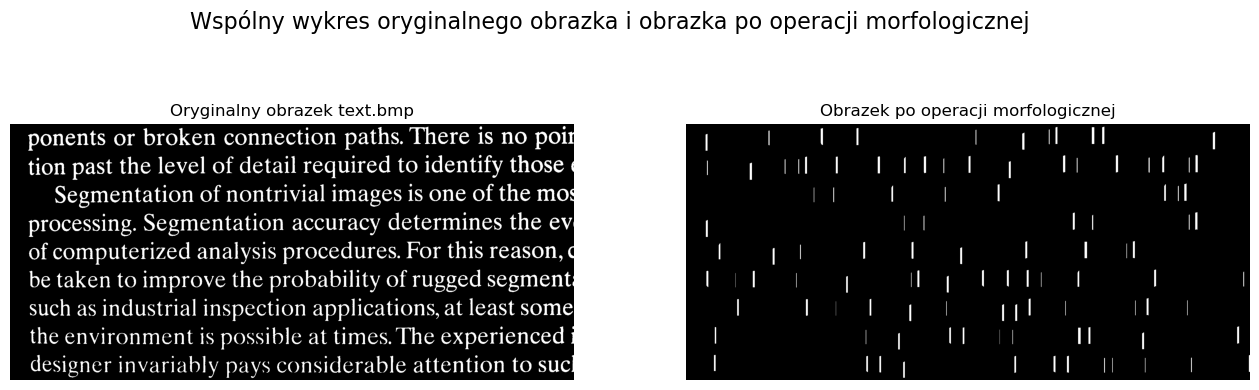

In [19]:
# morfologiczne otwarcie z maską pionową
opened_text = cv2.morphologyEx(src = text, op = cv2.MORPH_OPEN, kernel = np.ones((51, 1)))

show_image_morph_single(text, opened_text, 'text.bmp', (16, 5))

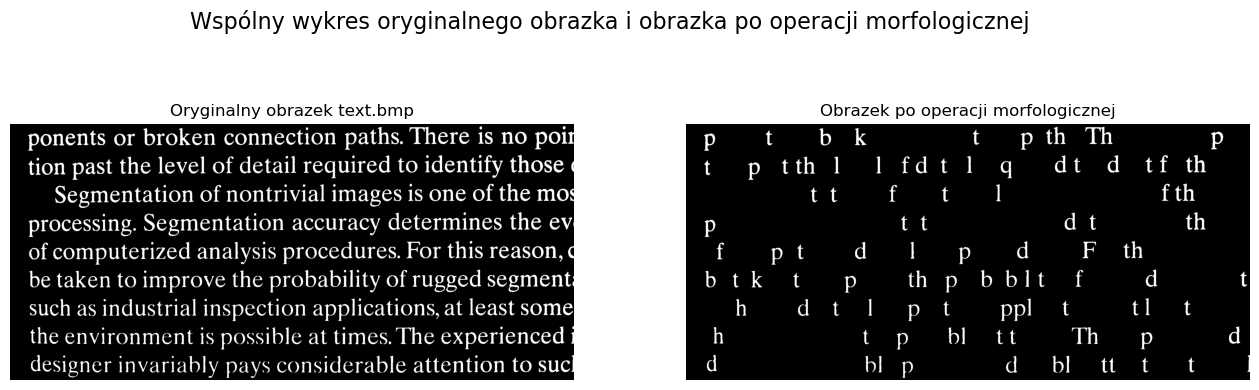

In [20]:
# samodzielnie dobieram element strukturalny
structuring_element = np.ones((3, 3))

marker = cv2.erode(src = text, kernel = np.ones((51, 1)))
reconstructed_text = morphological_reconstruction_binary(marker, text, structuring_element)

show_image_morph_single(text, reconstructed_text, 'text.bmp', (16, 5))

(np.float64(-0.5), np.float64(2017.5), np.float64(917.5), np.float64(-0.5))

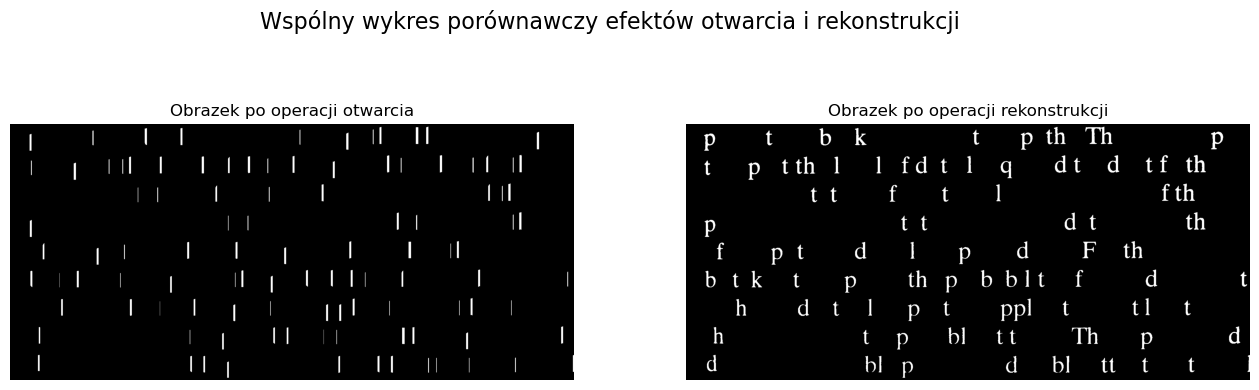

In [21]:
# porównanie efektu otwarcia i rekonstrukcji - wyświetlam je na wspólnym wykresie
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16, 5)
fig.suptitle("Wspólny wykres porównawczy efektów otwarcia i rekonstrukcji", fontsize = 16)

axs[0].imshow(opened_text, 'gray', vmin = 0, vmax = 255)
axs[0].set_title("Obrazek po operacji otwarcia")
axs[0].axis('off')

axs[1].imshow(reconstructed_text, 'gray', vmin = 0, vmax = 255)
axs[1].set_title("Obrazek po operacji rekonstrukcji")
axs[1].axis('off')

## Operacje morfologiczne dla obrazów w skali szarości

Wszystkie dotychczasowe operacje (oprócz transformacji trafi - nie trafi) mają swoje odpowiedniki dla obrazów w skali szarości. Konieczne jest tylko podanie definicji erozji i dylatacji w nieco innej formie:
- erozja – filtr __minimalny__,
- dylatacja – filtr __maksymalny__.


1. Wczytaj obraz *ferrari.bmp* i wykonaj na nim operacje morfologiczne: erozję i dylatację. Element strukturalny ustal na kwadrat 3×3. Oblicz też różnicę pomiędzy obrazem po dylatacji, a po erozji – czyli tzw. *gradient morfologiczny*. Rezultaty wyświetl na wspólnym wykresie.
2. Otwarcie to tłumienie jasnych detali na obrazie. Zamknięcie to tłumienie ciemnych detali na obrazie. Potwierdź powyższe stwierdzenia, wykonując obie operacje na obrazie _ferrari.bmp_.
3. Wykonaj operacje *top-hat* i *bottom-hat* - `cv2.morphologyEx(image, cv2.MORPH_TOPHAT, structuring_element)` oraz `cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, structuring_element)` na obrazie _ferrari.bmp_. Jakie obszary udało się wykryć za pomocą tej operacji? Z jakich operacji składa się filtr *top-hat*?
4. Wczytaj obraz *rice.png* (z laboratorium o binaryzacji). Wyświetl go. Zwróć uwagę na niejednorodne oświetlenie. Wykonaj operację *top-hat* z dużym elementem strukturalnym (np. koło o rozmiarze 10) na tym obrazie. Wynik wyświetl. Co stało się z niejednorodnością oświetlenia?

(np.float64(-0.5), np.float64(243.5), np.float64(161.5), np.float64(-0.5))

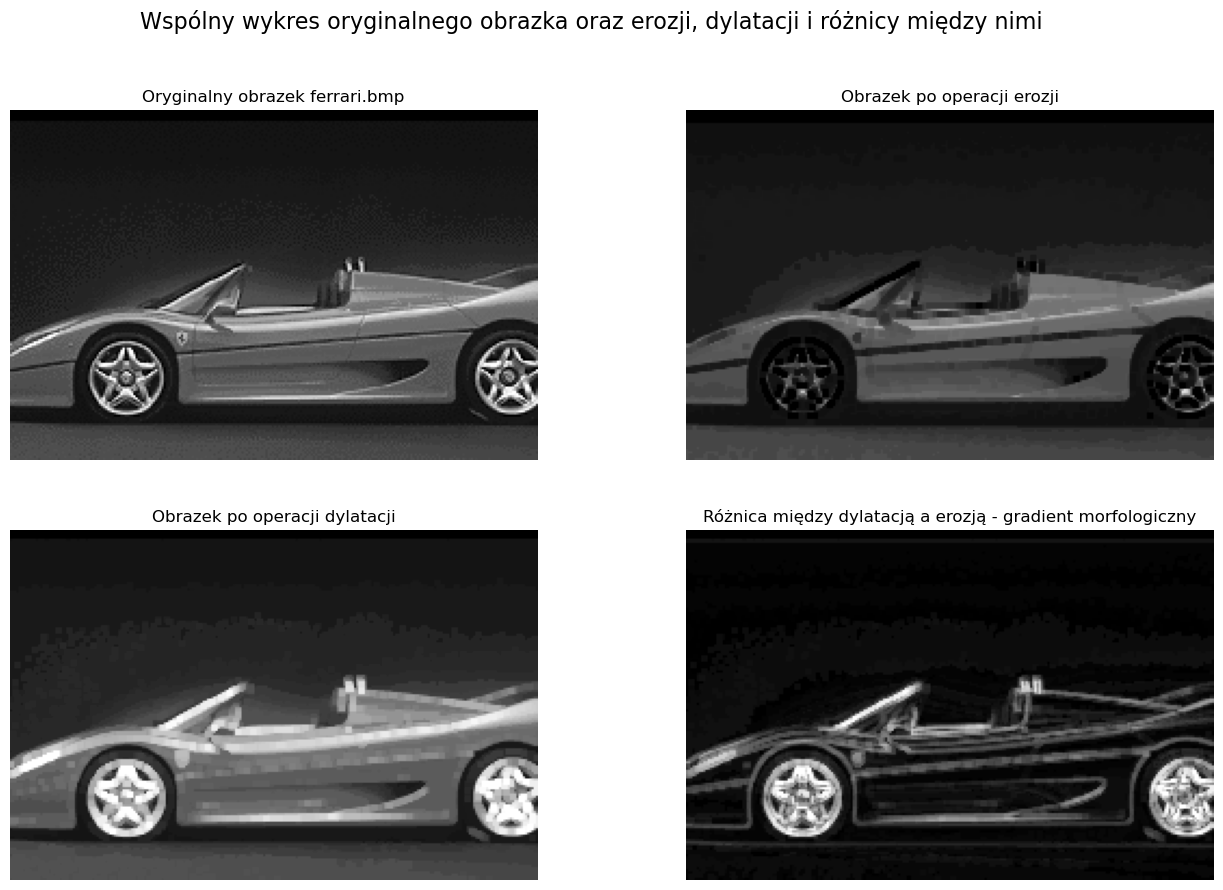

In [22]:
# wczytanie obrazu ferrari.bmp
ferrari = cv2.imread('ferrari.bmp', cv2.IMREAD_GRAYSCALE)

# operacje morfologiczne na obrazku
eroded_ferrari = cv2.erode(src = ferrari, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
dilated_ferrari = cv2.dilate(src = ferrari, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
morph_gradient = dilated_ferrari - eroded_ferrari

# wyświetlanie rezultatów
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(16, 10)
fig.suptitle("Wspólny wykres oryginalnego obrazka oraz erozji, dylatacji i różnicy między nimi", fontsize = 16)

axs[0, 0].imshow(ferrari, 'gray', vmin = 0, vmax = 255)
axs[0, 0].set_title("Oryginalny obrazek ferrari.bmp")
axs[0, 0].axis('off')

axs[0, 1].imshow(eroded_ferrari, 'gray', vmin = 0, vmax = 255)
axs[0, 1].set_title("Obrazek po operacji erozji")
axs[0, 1].axis('off')

axs[1, 0].imshow(dilated_ferrari, 'gray', vmin = 0, vmax = 255)
axs[1, 0].set_title("Obrazek po operacji dylatacji")
axs[1, 0].axis('off')

axs[1, 1].imshow(morph_gradient, 'gray', vmin = 0, vmax = 255)
axs[1, 1].set_title("Różnica między dylatacją a erozją - gradient morfologiczny")
axs[1, 1].axis('off')

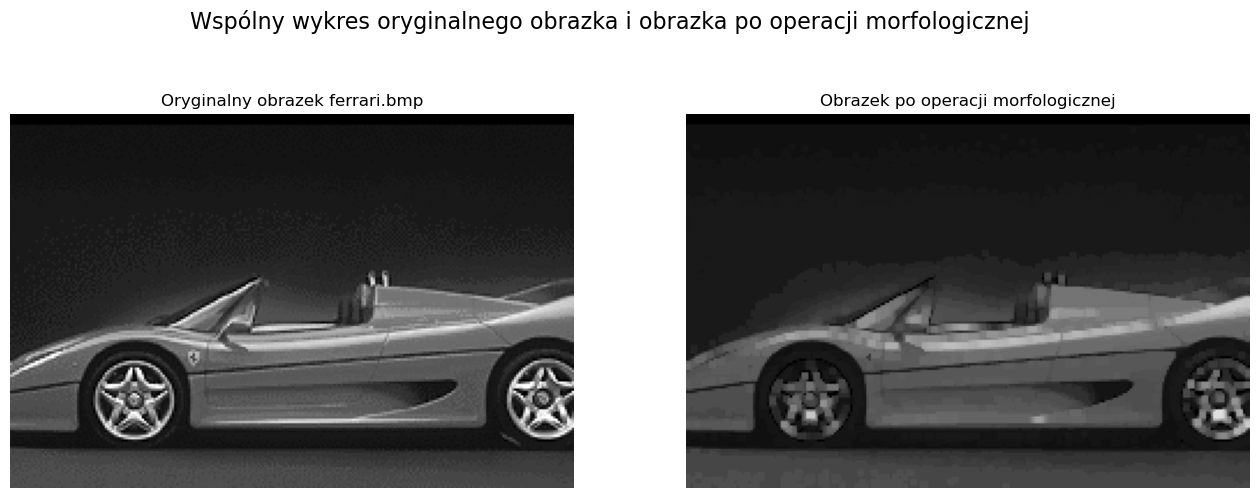

In [23]:
opened_ferrari = cv2.morphologyEx(src = ferrari, op = cv2.MORPH_OPEN, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))

# wyświetlam oryginalny obrazek oraz efekt otwarcia
show_image_morph_single(ferrari, opened_ferrari, 'ferrari.bmp', (16, 6))

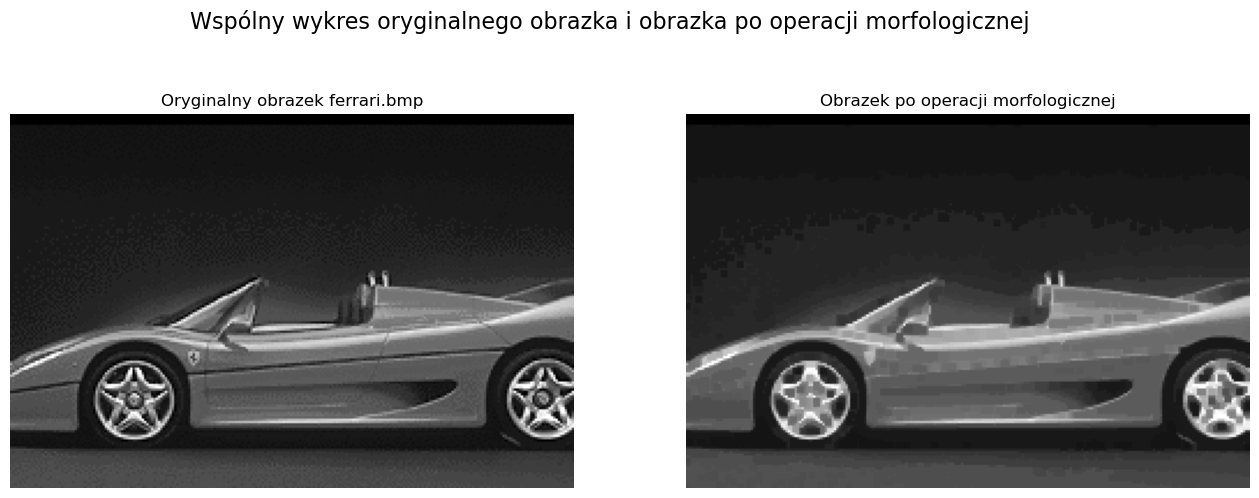

In [24]:
closed_ferrari = cv2.morphologyEx(src = ferrari, op = cv2.MORPH_CLOSE, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))

# wyświetlam oryginalny obrazek oraz efekt zamknięcia
show_image_morph_single(ferrari, closed_ferrari, 'ferrari.bmp', (16, 6))

(np.float64(-0.5), np.float64(243.5), np.float64(161.5), np.float64(-0.5))

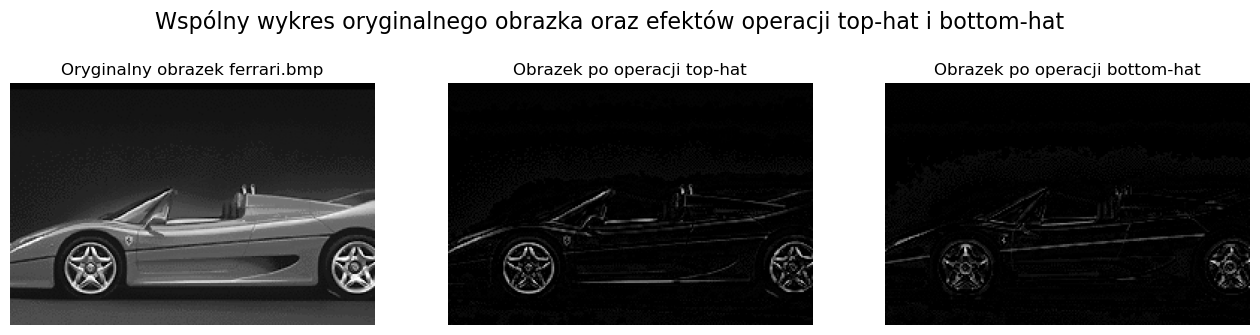

In [25]:
tophat_ferrari = cv2.morphologyEx(src = ferrari, op = cv2.MORPH_TOPHAT, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))
bottomhat_ferrari = cv2.morphologyEx(src = ferrari, op = cv2.MORPH_BLACKHAT, kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
fig.suptitle("Wspólny wykres oryginalnego obrazka oraz efektów operacji top-hat i bottom-hat", fontsize = 16)

axs[0].imshow(ferrari, 'gray', vmin = 0, vmax = 255)
axs[0].set_title("Oryginalny obrazek ferrari.bmp")
axs[0].axis('off')

axs[1].imshow(tophat_ferrari, 'gray', vmin = 0, vmax = 255)
axs[1].set_title("Obrazek po operacji top-hat")
axs[1].axis('off')

axs[2].imshow(bottomhat_ferrari, 'gray', vmin = 0, vmax = 255)
axs[2].set_title("Obrazek po operacji bottom-hat")
axs[2].axis('off')


---

### Odpowiedzi na pytania

#### Jakie obszary udało się wykryć za pomocą tej operacji?

Operacja _top-hat_ pozwoliła odkryć najjaśniejsze części obrazu, czyli poniekąd maksima lokalne. Z kolei operacja *bottom-hat* służy do wykrywania ciemniejszych fragmentów (minimów lokalnych), ale ze względu na specyfikę badanego obrazka _ferrari.bmp_, efekty jej działania nie są szczególnie widoczne.

---

#### Z jakich operacji składa się filtr top-hat?

Filtr _top-hat_ składa się z dwóch operacji:
1. Najpierw potrzebujemy dokonać otwarcia obrazu, 
2. Następnie **odejmujemy** wynik otwarcia od obrazu oryginalnego.

---


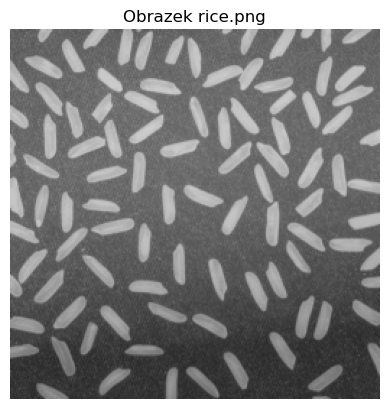

In [26]:
# wczytanie obrazu rice.png
rice = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)

# wyświetlam obrazek
show_image(rice, "Obrazek rice.png")

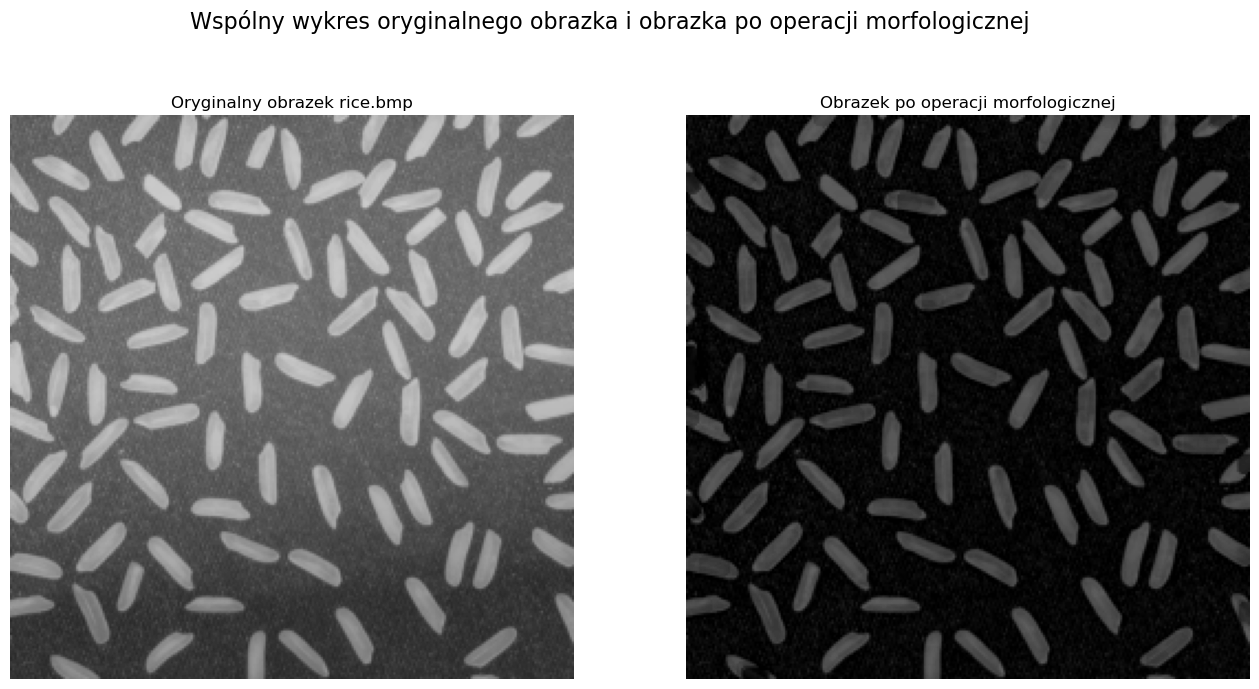

In [27]:
# jako element strukturalny wybieram koło o rozmiarze 10
tophat_rice = cv2.morphologyEx(src = rice, op = cv2.MORPH_TOPHAT, kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)))

# wyświetlam oryginalny obrazek wraz z wynikiem operacji
show_image_morph_single(rice, tophat_rice, 'rice.bmp', (16, 8))


---

#### Co stało się z niejednorodnością oświetlenia?

Można powiedzieć, że zanikła - po operacji cały obrazek jest ciemniejszy, ale oświetlenie można teraz traktować jako jednorodne. Nie widać różnic w oświetleniu, które występowały na oryginalnym obrazku.

---


## Przykład zastosowania morfologii

1. Wczytaj obraz *calculator.bmp*. Wyświetl go. Zadanie do realizacji: wyizolować tekst na klawiszach kalkulatora.
2. W pierwszym kroku usunięte zostaną poziome odbicia znajdujące się na górnej krawędzi każdego z klawiszy. Wykorzystamy fakt, że odbicie jest dłuższe niż jakikolwiek pojedynczy znak. Wykonujemy otwarcie przez rekonstrukcję (można wykorzystać kod z wcześniejszego zadania, ale tym razem mamy do czynienia z obrazem w skali szarości zamiast z binarnym – proszę się zastanowić, jaka operacja jest odpowiednikiem operacji AND):
  - początkowo wykonujemy erozję z elementem strukturalnym w postaci poziomej linii - `np.ones((1, 71))`,
  - następnie dokonujemy rekonstrukcji: **marker** – obraz po erozji, **maska** – obraz oryginalny,
  - wynik operacji wyświetl. Dla porównania wyświetl wynik klasycznego otwarcia z takim samym elementem strukturalnym. W czym otwarcie przez rekonstrukcję jest lepsze od klasycznego?
3. W poprzednim kroku (tj. w wyniku otwarcia przez rekonstrukcję) uzyskaliśmy obraz tła. Należy go teraz odjąć od obrazu oryginalnego. Ten rodzaj operacji można nazwać *top-hat* poprzez rekonstrukcję. Wynik wyświetl. Dla porównania wyświetl wynik klasycznej operacji *top-hat* – różnicy między obrazem oryginalnym, a obrazem po klasycznym otwarciu.
4. W podobny sposób należy zlikwidować odblaski pionowe:
  - erozja z elementem strukturalnym w postaci poziomej linii - `np.ones((1, 11))` - zostaną zachowane wszystkie znaki (bo prawie wszystkie są szersze). Uwaga, operacje wykonujemy na uzyskanym w kroku 3. rezultacie odjęcia _obrazu po rekonstrukcji_ od _obrazu oryginalnego_.
  - rekonstrukcja: marker – obraz po erozji, maska – obraz z punktu 3. (różnica oryginalnego i tła),
  - wynik wyświetl.
5. Rezultat jest niemal satysfakcjonujący, ale wystąpił problem z cienkimi pionowymi elementami napisów – np. I na klawiszu ASIN. Wykorzystując fakt, że usunięte znaki znajdują się w bezpośrednim sąsiedztwie istniejących znaków, wykonujemy następujące operacje:
  - dylatacja z elementem `np.ones((1, 21))`,
  - rekonstrukcja z markerem w postaci minimum(obraz po dylatacji z punktu powyżej, obraz uzyskany w punkcie 3., tj. różnica obrazu oryginalnego i tła) oraz maską – obraz z punktu 3.
6. Rezultat wyświetl. Czy za pomocą zaproponowanych operacji udało się uzyskać zamierzony efekt – ekstrakcję napisów?


In [28]:
# funkcja dokonująca rekonstrukcji dla obrazu w odcieniach szarości
def morphological_reconstruction_gray(marker, mask, structuring_element):
    prev_marker = marker
    
    while True:
        dilated_marker = cv2.dilate(src = prev_marker, kernel = structuring_element)
        new_marker = np.minimum(dilated_marker, mask)
        
        # sprawdzenie, czy nic się nie zmieniło - warunek końca
        if np.all(prev_marker == new_marker):
            return prev_marker
        
        # kolejna iteracja
        prev_marker = new_marker

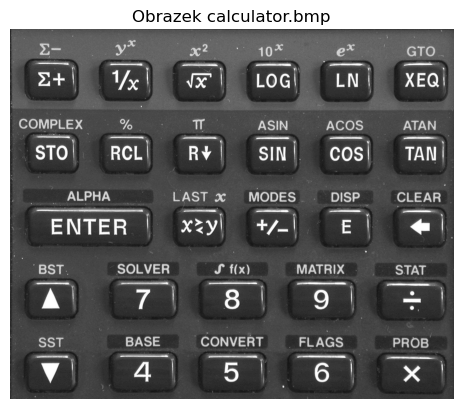

In [29]:
# wczytanie obrazu calculator.bmp
calculator = cv2.imread('calculator.bmp', cv2.IMREAD_GRAYSCALE)

# wyświetlam obrazek
show_image(calculator, "Obrazek calculator.bmp")

In [30]:
structuring_element = np.ones((3, 3))
marker = cv2.erode(src = calculator, kernel = np.ones((1, 71)))

# rekonstrukcja
reconstructed_calculator = morphological_reconstruction_gray(marker, calculator, structuring_element)

# klasyczne otwarcie
opened_calculator = cv2.morphologyEx(src = calculator, op = cv2.MORPH_OPEN, kernel = np.ones((1, 71)))

(np.float64(-0.5), np.float64(1359.5), np.float64(1133.5), np.float64(-0.5))

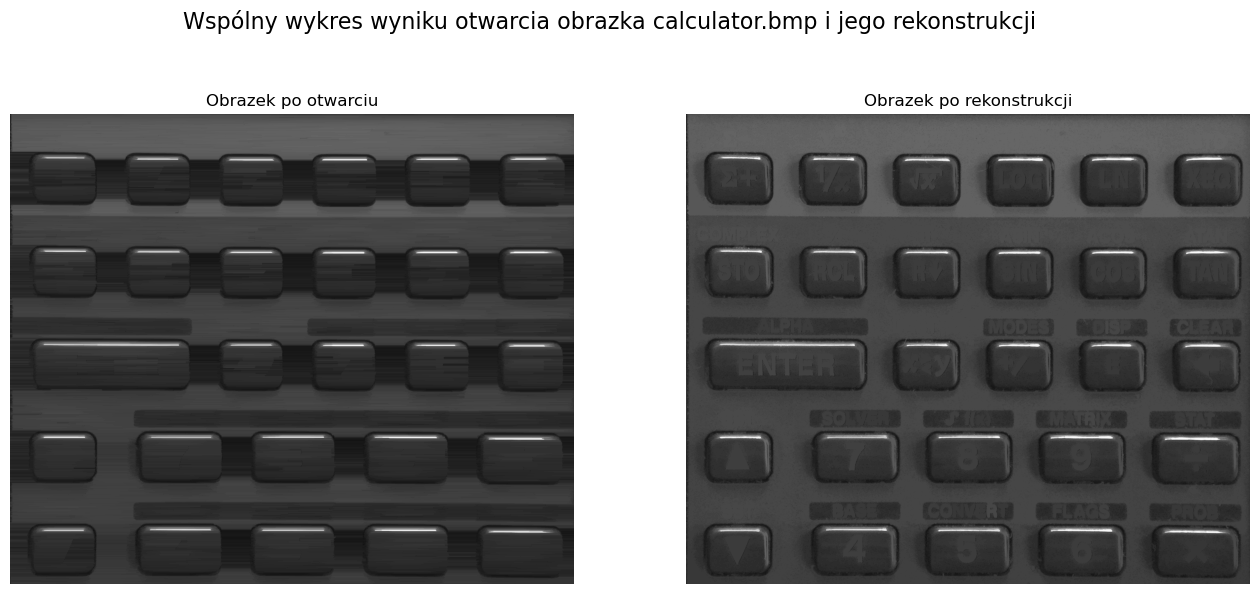

In [31]:
# porównanie wyniku otwarcia z rekonstrukcją
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16, 7)
fig.suptitle("Wspólny wykres wyniku otwarcia obrazka calculator.bmp i jego rekonstrukcji", fontsize = 16)

axs[0].imshow(opened_calculator, 'gray', vmin = 0, vmax = 255)
axs[0].set_title("Obrazek po otwarciu")
axs[0].axis('off')

axs[1].imshow(reconstructed_calculator, 'gray', vmin = 0, vmax = 255)
axs[1].set_title("Obrazek po rekonstrukcji")
axs[1].axis('off')


---

#### W czym otwarcie przez rekonstrukcję jest lepsze od klasycznego?

Patrząc na wynik otwarcia przez rekonstrukcję widać, że lepiej zostały wydzielone klawisze kalkulatora wraz z górnymi "podpisami" oraz widać "ślady tekstu" z klawiszy (oraz z podpisów nad klawiszami).

---


(np.float64(-0.5), np.float64(1359.5), np.float64(1133.5), np.float64(-0.5))

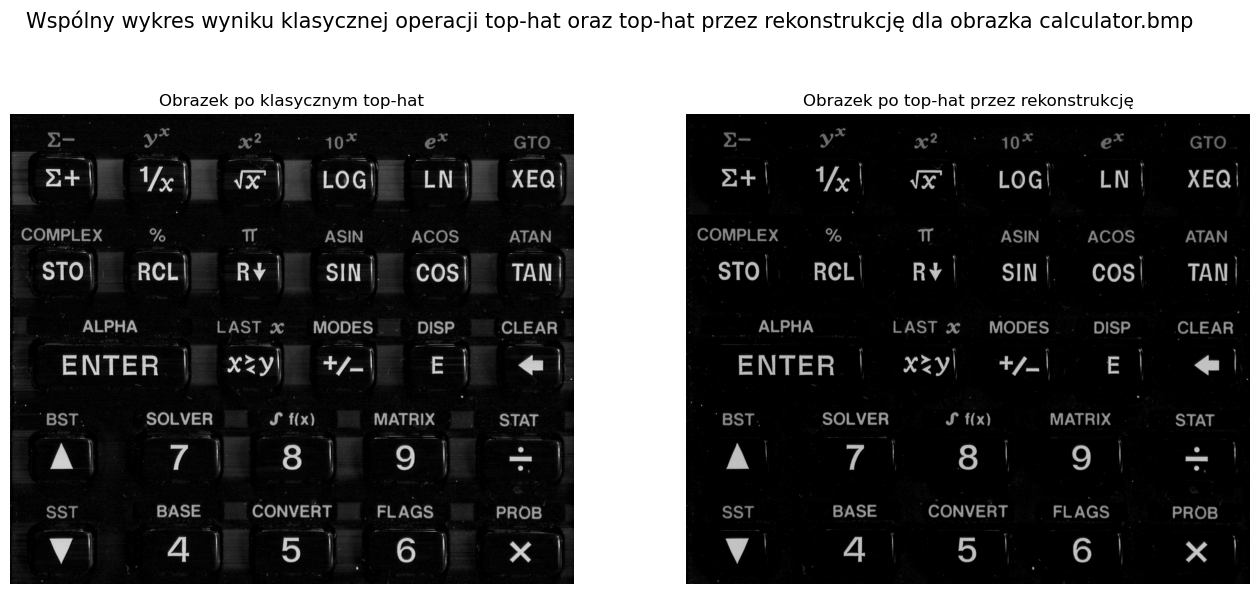

In [32]:
tophat_reconstructed_calculator = calculator - reconstructed_calculator
tophat_classic_calculator = calculator - opened_calculator

# porównanie top-hat przez rekonstrukcję z klasycznym top-hat
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16, 7)
fig.suptitle("Wspólny wykres wyniku klasycznej operacji top-hat oraz top-hat przez rekonstrukcję dla obrazka calculator.bmp", fontsize = 15)

axs[0].imshow(tophat_classic_calculator, 'gray', vmin = 0, vmax = 255)
axs[0].set_title("Obrazek po klasycznym top-hat")
axs[0].axis('off')

axs[1].imshow(tophat_reconstructed_calculator, 'gray', vmin = 0, vmax = 255)
axs[1].set_title("Obrazek po top-hat przez rekonstrukcję")
axs[1].axis('off')

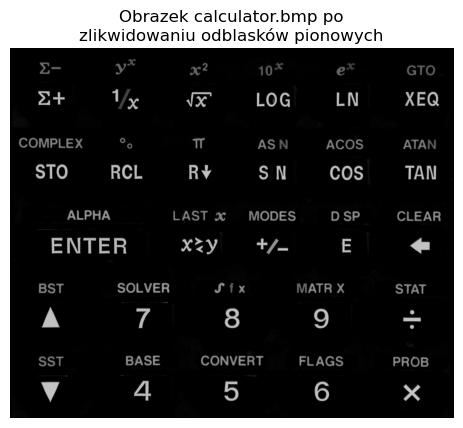

In [33]:
new_calculator = tophat_reconstructed_calculator
marker = cv2.erode(src = new_calculator, kernel = np.ones((1, 11)))

# rekonstrukcja
reconstructed_calculator = morphological_reconstruction_gray(marker, new_calculator, structuring_element)

# wyświetlam obrazek po rekonstrukcji
show_image(reconstructed_calculator, "Obrazek calculator.bmp po\nzlikwidowaniu odblasków pionowych")

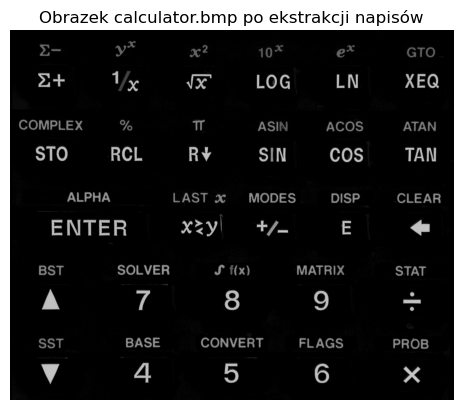

In [34]:
# dylatacja poprzedniego obrazu po rekonstrukcji
dilated_reconstructed_calculator = cv2.dilate(src = reconstructed_calculator, kernel = np.ones((1, 21)))

marker = np.minimum(dilated_reconstructed_calculator, new_calculator)

# rekonstrukcja
reconstructed_calculator = morphological_reconstruction_gray(marker, new_calculator, structuring_element)

# wyświetlam finalnie uzyskany obrazek
show_image(reconstructed_calculator, "Obrazek calculator.bmp po ekstrakcji napisów")


---

#### Czy za pomocą zaproponowanych operacji udało się uzyskać zamierzony efekt – ekstrakcję napisów?

Według mnie tak, po wykonaniu tych wszystkich operacji finalnie mamy jednolite czarne tło, natomiast jasnym kolorem (blisko barwy białej) są zaznaczone znaki na klawiszach. Nieco ciemniejsze (szarawe) są podpisy nad klawiszami, ale także one są wystarczająco widoczne.

---
